<a href="https://colab.research.google.com/github/Leisure-Codes/Deep-neural-network-using-tensorflow/blob/Leisure_Codes/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep neural network using tensorflow for binary classification

- The dataset has two features('feature1' and 'feature2') and one target variable
- The target variable(named as 'class') maps each record to either 0 or 1

### Step 1 :- Importing & reading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

The data is provided as file named 'blobs.csv'.  
Using pandas we read the csv file and assign the resulting dataframe to variable 'data'   
for example if file name is 'xyz.csv' we read file as **pd.read_csv('xyz.csv')** 

In [3]:
data = pd.read_csv('blobs.csv')


### Step 2 :- Extracting Feature & Target Variable.

The following code extacts features and target variable and assign it to variable X and y respectively

In [4]:
X = data[['feature1', 'feature2']].values
y = data['class'].values

- We run the below piece of  code to visualize the data in x-y plane.The green and blue dots corresponds to class 0 and 1 respectively
- You can see that the data is not linearly seperable i.e you cannot draw one specific boundary to classify the data.

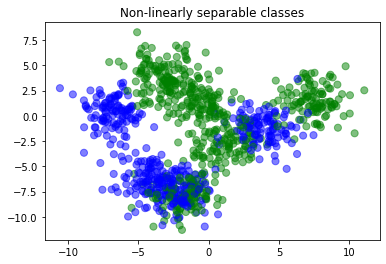

In [5]:
colors=['green','blue']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,
           marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.show()

### Step 3 :- Fiting Logistic Regression On data.

- Before diving into deep neural network lets try to classify the data using simple logistic regression.    

In [6]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
_ = lr_model.fit(X, y)

- Run the below cell to define the method to plot the decision boundary.

In [7]:
def plot_decision_boundary( X, y, model):
    plt.clf()
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1   
    colors=['blue','green']
    cmap = matplotlib.colors.ListedColormap(colors)   
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    A = model(np.c_[xx.ravel(), yy.ravel()])
    A = A.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8,cmap=cmap)
    plt.title("Decision Boundary for learning rate:")
    plt.show()

- Run the cell below cell to plot the decision boundary perdicted by logistic regression model

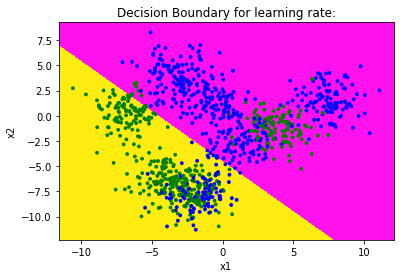

In [8]:
plot_decision_boundary(X.T,y,lambda x: lr_model.predict(x))

- From the above plot we can say that simple logistic regression poorly perfroms in classifying the data since the decision boundary is not able to effectively classify the two classes.
- Now we build a deep neural network to classify the same data.  
Preparing the data:  
    - Transposing X so that rows represents the features and column represents samples. Assigigning the resulting array to variable X_data
    - We reshape data y to a row vector whose length equal to number of samples & Assign the resulting vector to variable y_data.

### Step 4 :- Creating a Deep Neural Net from Scratch

In [9]:
X_data = X.T
y_data = y.reshape(1,len(y))

Now we define the layer dimension as an array  called **'layer_dims'**  with one input layer **equal to number of features**, **two hidden layer** with **nine nodes** each and **one final output layer** with** one node**.


In [10]:
layer_dims = [2,9,9,1]

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


We define a function named placeholders to return two placeholders one for input data as A_0 and one for output data as Y.


In [12]:
def placeholders(num_features):

  A_0 = tf.placeholder(dtype = tf.float64, shape = ([num_features,None]))

  Y = tf.placeholder(dtype = tf.float64, shape = ([1,None]))

  return A_0,Y

Now We Create function named initialize_parameters_deep() to initialize weights and bias for each layer

In [13]:
def initialize_parameters_deep(layer_dims):
  L = len(layer_dims)
  parameters = {}
  for l in range(1,L):
    parameters['W' + str(l)] = tf.Variable(initial_value=tf.random_normal([layer_dims[l], layer_dims[l-1]], dtype=tf.float64)* 0.01)
    parameters['b' + str(l)]=tf.Variable(initial_value=tf.zeros([layer_dims[l],1],dtype=tf.float64) * 0.01)
  return parameters 

Defining functon named linear_forward_prop() to define forward propagation for a given layer.


In [14]:
def linear_forward_prop(A_prev,W,b,activation):

  Z = tf.add(tf.matmul(W, A_prev), b)

  if activation == "sigmoid":

    A = Z

  elif activation == "relu":

    A = tf.nn.relu(Z)

  return A

Here we define a forward propagation for entire network as l_layer_forward()


In [15]:
def l_layer_forwardProp(A_0, parameters):

  A = A_0

  L = len(parameters)//2

  for l in range(1,L):

    A_prev = A

    A = linear_forward_prop(A_prev,parameters['W' + str(l)],parameters['b' + str(l)], "relu")

  A = linear_forward_prop(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid" )

  return A

### Step 5 :- Creating & Training the Model

In [16]:
def deep_layer_network(X_data,y_data, layer_dims, learning_rate, num_iter):
  num_features = layer_dims[0]
  A_0, Y = placeholders(num_features)
  parameters = initialize_parameters_deep(layer_dims)
  Z_final = l_layer_forwardProp(A_0, parameters)
  cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final,labels=Y))
  train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)                                     #call tensorflow's gradient descent optimizer function with minimize cost  
  init = tf.global_variables_initializer()    
  
  with tf.Session() as sess:
    sess.run(init)
    for i in range(num_iter):
      _,c = sess.run([train_net, cost], feed_dict={A_0: X_data, Y: y_data})
      if i % 1000 == 0:
        print(c)
    with open("Output.txt", "w") as text_file:
      text_file.write("c= %f\n" % c)
    params = sess.run(parameters)
  return params

In [17]:
parameters = deep_layer_network(X_data,y_data,layer_dims,0.3,10000)    #fill the parameters 

0.6931480099287242
0.3536901252074855
0.2949685573735312
0.28810834487901804
0.28471277300890024
0.2812908460925792
0.28165670175470164
0.28026379203659774
0.2805329662127435
0.27978840279246453


### Step 6 :- Using Our Model For Prediction

In [18]:
def predict(A_0, parameters):
  with tf.Session() as sess:
    Z = l_layer_forwardProp(A_0, parameters)
    A = sess.run(tf.round(tf.sigmoid(Z)))
  return A

### Step 7 :- Visualizaing The Output using decision Boundry

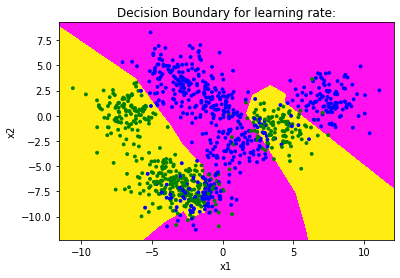

In [19]:
plot_decision_boundary(X_data,y,lambda x: predict(x.T,parameters))